<a href="https://colab.research.google.com/github/jackyjack00/Machine_Learning_Deep_Learning_LAB/blob/main/Es2_4_GMM_generative_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Work on the MNIST handwritten digits dataset

In [ ]:
from sklearn.datasets import load_digits

X , y = load_digits(return_X_y = True)
print( X.shape , y.shape)

(1797, 64) (1797,)


Print as reference the first 30 digits

In [ ]:
def plot_digit( flatten_digit, label = None , side = 8 , ax = None ):
  ax = ax or plt.gca()
  ax.imshow( flatten_digit.reshape( side , side) )
  if label is not None:
    ax.set_title(f"Digit: {label}")

(3, 10)


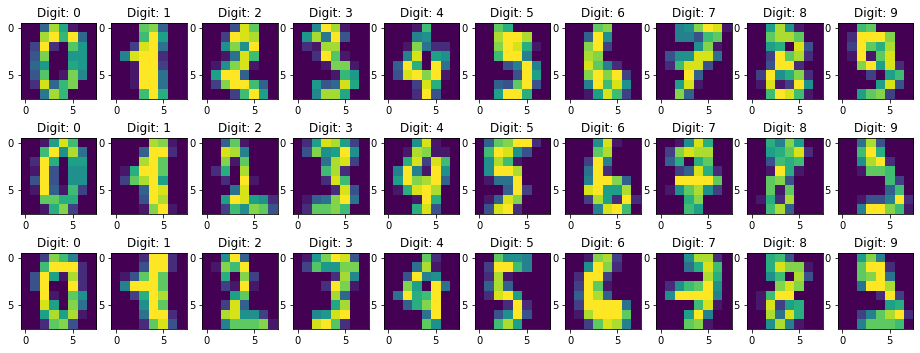

In [ ]:
import matplotlib.pyplot as plt

fig , ax = plt.subplots( 3 , 10 , figsize=(16, 6))
print(ax.shape)



for i , data_sample  in enumerate( zip( X[:30,:] , y[:30] ) ):
  flat_digit = data_sample[0]
  label= data_sample[1]
  num_row = int( i / 10 ) 
  num_col = int( i - num_row*10) 
  plot_digit(flat_digit , label , ax = ax[ num_row , num_col ]  )
  


Use a PCA to preseve .99 of initial variance

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(.99)
scaler = StandardScaler()

X_preprocessed = pca.fit_transform( scaler.fit_transform(X) )

X_preprocessed.shape

(1797, 54)

so the pca used only 54 of the 64 available features (pixels)

Fit a GMM model

In [ ]:
def gmm_bic_score ( estimator , x ):
  return - estimator.bic( x ) 

Using a broad range of [ 10 : 250 ] in looking for n_components of GMM

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
import numpy as np

params = {
    "n_components" : np.linspace(10 , 250 , 20 , dtype=int)
}

grid_search = GridSearchCV( GaussianMixture() , params , scoring = gmm_bic_score , cv = 5 )
grid_search.fit(X_preprocessed)

GridSearchCV(cv=5, estimator=GaussianMixture(),
             param_grid={'n_components': array([ 10,  22,  35,  47,  60,  73,  85,  98, 111, 123, 136, 148, 161,
       174, 186, 199, 212, 224, 237, 250])},
             scoring=<function gmm_bic_score at 0x7f51b2f5b940>)

In [ ]:
grid_search.best_params_

{'n_components': 10}

Using a narrower range of [ 10 : 54 ] in looking for n_components of GMM

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
import numpy as np

params = {
    "n_components" : np.linspace(10 , 30 , 2 , dtype=int)
}

grid_search = GridSearchCV( GaussianMixture( random_state=42 ) , params , scoring = gmm_bic_score , cv = 5 )
grid_search.fit(X_preprocessed)

GridSearchCV(cv=5, estimator=GaussianMixture(random_state=42),
             param_grid={'n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 30])},
             scoring=<function gmm_bic_score at 0x7f51b2f5b940>)

In [ ]:
grid_search.best_params_

{'n_components': 14}

Now we use the best GMM found { n_components = 14 } to generate new data

First: fit the model

In [ ]:
clf = grid_search.best_estimator_
clf.fit(X_preprocessed)

GaussianMixture(n_components=14, random_state=42)

In [ ]:
clf.converged_

True

In [ ]:
clf2 = GaussianMixture( 112 )
clf2.fit(X_preprocessed)

GaussianMixture(n_components=112)

Second: generate 10 new data_points

In [ ]:
new_data = clf.sample( 100 )

In [ ]:
print( f"type: {type(new_data)}")
print( f"length: {len(new_data)}")

type: <class 'tuple'>
length: 2


In [ ]:
print( f"The new data points are in new_data[0] with shape {new_data[0].shape}")
print( "So 10 points, user specified numbers.")
print("Each one with 54 components, number enstablished by PCA decomposition, on which the model is trained.")

The new data points are in new_data[0] with shape (100, 54)
So 10 points, user specified numbers.
Each one with 54 components, number enstablished by PCA decomposition, on which the model is trained.


In [ ]:
print( f"The associated components of gmm are in new_data[1] with shape {new_data[1].shape}")
print( "So 10 labels, user specified numbers.")

The associated labels are in new_data[1] with shape (100,)
So 10 labels, user specified numbers.


Now apply the inverse PCA and preprocessing to have some printable digits

In [ ]:
new_data_printable = scaler.inverse_transform( pca.inverse_transform( new_data[0] ) )

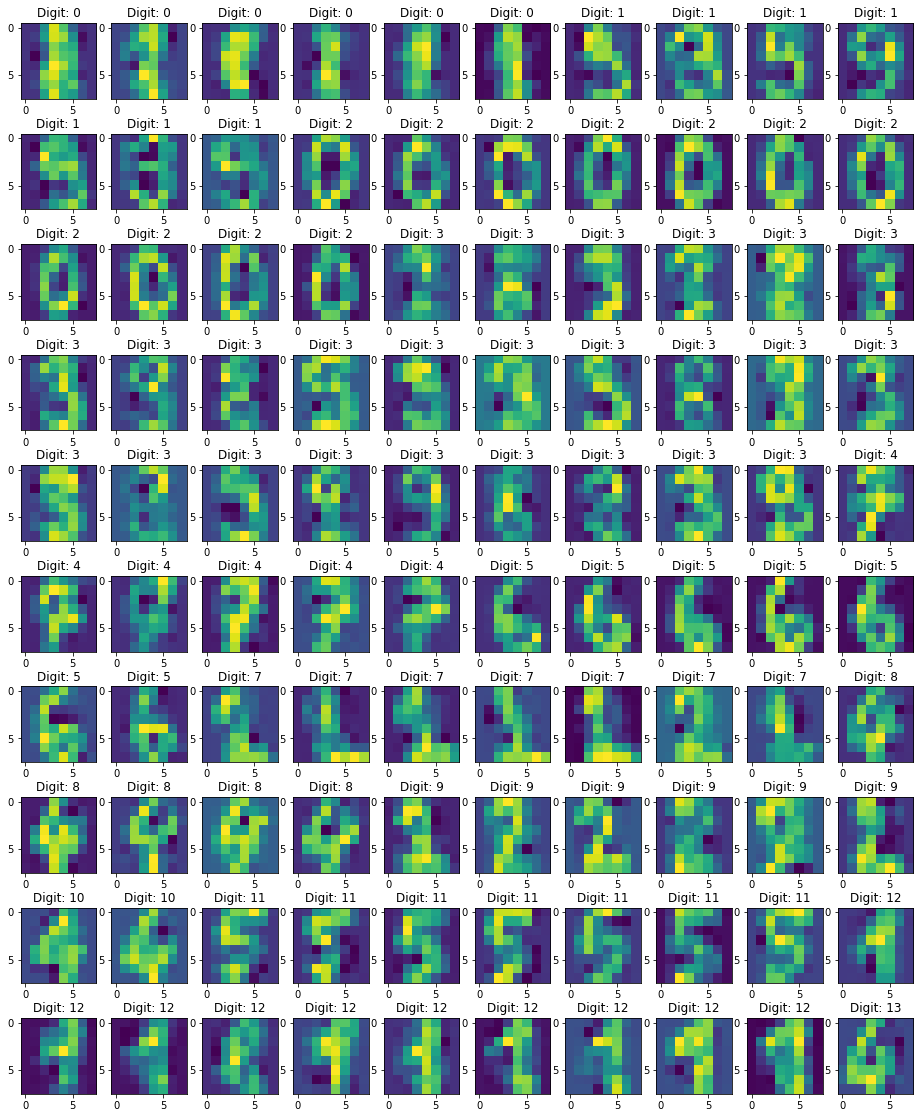

In [ ]:
fig , ax = plt.subplots( 10, 10 , figsize=(16, 20))

for i , data_sample  in enumerate( zip( new_data_printable, new_data[1] ) ):
  flat_digit = data_sample[0]
  label = data_sample[1] 
  num_row = int( i / 10 ) 
  num_col = int( i - num_row*10) 
  
  plot_digit(flat_digit , label , ax = ax[num_row , num_col]  )
  

In [ ]:
np.unique( new_data[1] )

array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13])